In [1]:
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#connect to a database
connection = pymysql.connect(host="127.0.0.1",
                                    user="root",
                                    passwd = "Siyo@2020",
                                    db = "mydb")

connection

In [3]:
covid19_dataset = pd.read_sql_query("SELECT * FROM mydb.coronavirus_statsdata",connection)
covid19_dataset.head()

,OBJECTID,ISO_CODE,COUNTRY_NAME,Date_epicrv,NewCase,TotalCase,NewDeath,TotalDeath
0,1,AFG,Afghanistan,2020-02-24T00:00:00.000Z,1,1,0,0
1,2,AFG,Afghanistan,2020-02-25T00:00:00.000Z,0,1,0,0
2,3,AFG,Afghanistan,2020-02-26T00:00:00.000Z,0,1,0,0
3,4,AFG,Afghanistan,2020-02-27T00:00:00.000Z,0,1,0,0
4,5,AFG,Afghanistan,2020-02-28T00:00:00.000Z,0,1,0,0


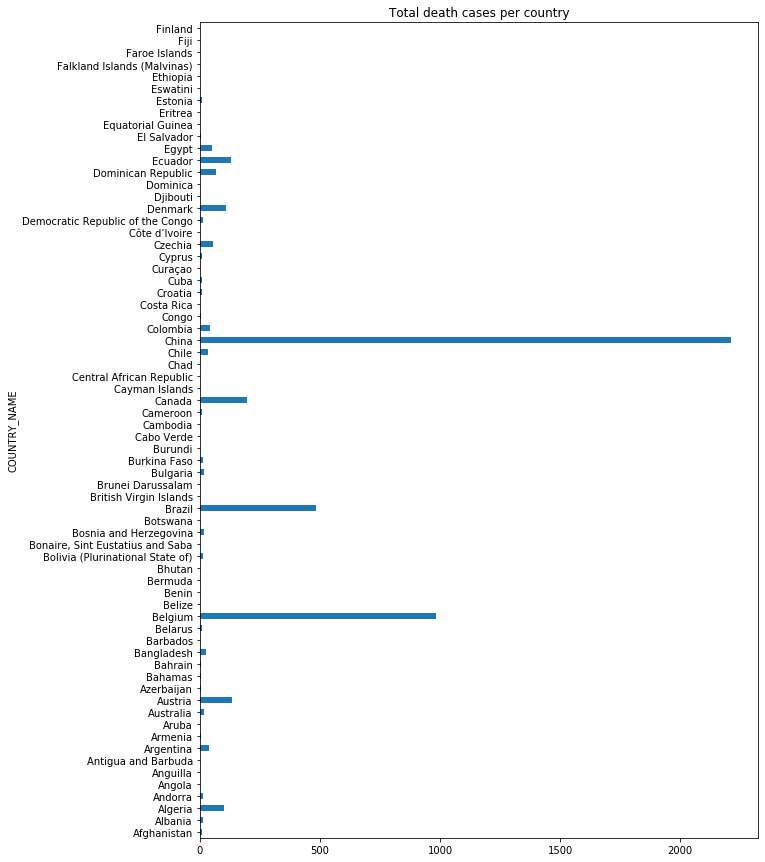

In [4]:
fig,ax = plt.subplots()
covid19_dataset.groupby("COUNTRY_NAME")["TotalDeath"].mean().plot(kind="barh",title="Total death cases per country",figsize=(10,15))

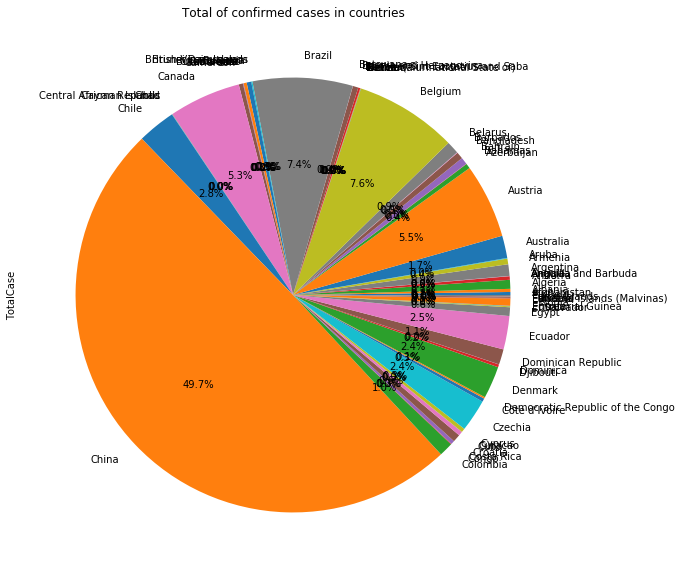

In [5]:
df = covid19_dataset.filter(["COUNTRY_NAME","TotalCase"])

df.groupby("COUNTRY_NAME")["TotalCase"].mean().plot(kind="pie",
                        title="Total of confirmed cases in countries",figsize=(10,10),autopct="%.1f%%")

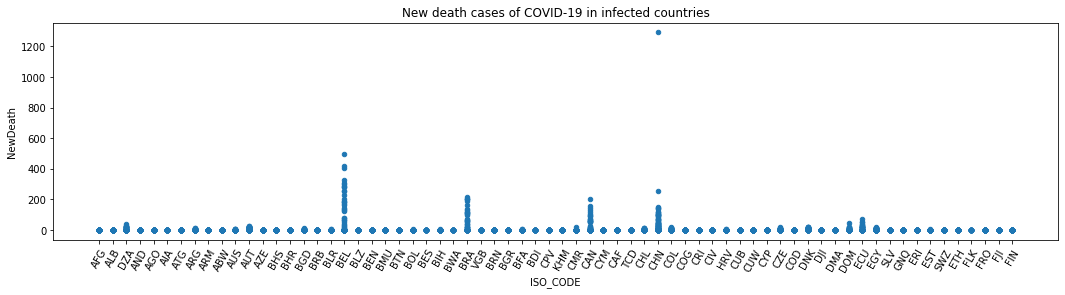

In [6]:
covid19_dataset.plot(x="ISO_CODE",y="NewDeath",kind="scatter",title="New death cases of COVID-19 in infected countries",figsize=(18,4))
plt.xticks(rotation=60)
plt.show()

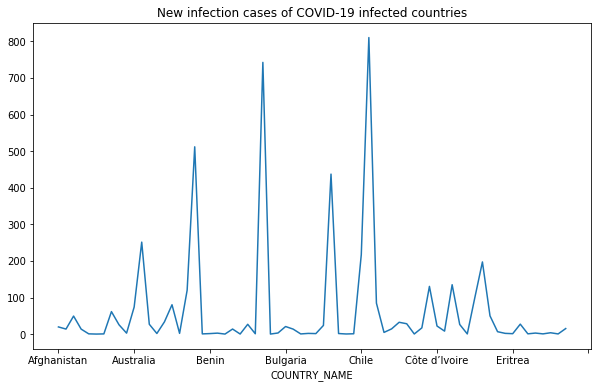

In [7]:
covid19_dataset.groupby("COUNTRY_NAME")["NewCase"].mean().plot(kind="line",title="New infection cases of COVID-19 infected countries",figsize=(10,6))